In [1]:
#20BCE0969

import pandas as pd
import numpy as np
from sklearn import tree
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')
attr=df.columns.values[1:-1]
target=df[df.columns.values[-1]].values.tolist()

In [3]:
df

,Instance,a1,a2,a3,Classification
0,1,True,Hot,High,No
1,2,True,Hot,High,No
2,3,False,Hot,High,Yes
3,4,False,Cool,Normal,Yes
4,5,False,Cool,Normal,Yes
5,6,True,Cool,High,No
6,7,True,Hot,High,No
7,8,True,Hot,Normal,Yes
8,9,False,Cool,Normal,Yes
9,9,False,Cool,High,Yes


In [4]:
data=df[attr]
data=np.array(pd.get_dummies(data))
data=np.delete(data,np.s_[2],axis=1)
data=np.delete(data,np.s_[3],axis=1)

In [5]:
print('Modified Dataset: (Each categorical attribute is represented by a number):\n')
print('a1:Boolean values\na2:{0-Hot; 1-Cool}\na3:{0-Normal; 1-High}')

Modified Dataset: (Each categorical attribute is represented by a number):

a1:Boolean values
a2:{0-Hot; 1-Cool}
a3:{0-Normal; 1-High}


In [6]:
print('Instances:\n',data)

Instances:
 [[True 0 1]
 [True 0 1]
 [False 0 1]
 [False 1 0]
 [False 1 0]
 [True 1 1]
 [True 0 1]
 [True 0 0]
 [False 1 0]
 [False 1 1]]


In [7]:
print('Target variable:\n',target)

Target variable:
 ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']


In [8]:
clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
clf=clf.fit(data,target)

In [9]:
plt.figure(figsize=(20,5))

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

[Text(0.4, 0.8333333333333334, 'a1 <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]\nclass = Yes'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Yes'),
 Text(0.6, 0.5, 'a3 <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = No'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No')]

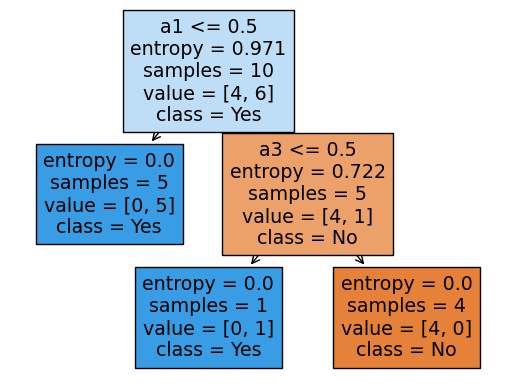

In [10]:
tree.plot_tree(clf,filled=True,feature_names=attr.tolist(),class_names=['No','Yes'])

In [11]:
#Predicition:
# <Tree,Cool,High>

a1,a2,a3=(True,1,1)
print('Predicted values:\n')
print('a1\ta2\ta3\tClass')
print('{}\t{}\t{}\t{}'.format(a1,a2,a3,clf.predict([[a1,a2,a3]])[0]))

Predicted values:

a1	a2	a3	Class
True	1	1	No
